In [1]:
import mxnet as mxnet

from mxnet import gluon,nd
from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
mx.random.seed(42)
X = mx.random.uniform(shape=(10, 3))
y = mx.random.uniform(shape=(10, 1))

In [3]:
# Create Gluon dataset
dataset = gluon.data.dataset.ArrayDataset(X, y)

In [4]:
# Access data at a particular index in the Dataset
sample = dataset[4]
sample

(
 [0.74707687 0.37641123 0.46362457]
 <NDArray 3 @cpu(0)>,
 
 [0.35440788]
 <NDArray 1 @cpu(0)>)

### Preloaded Datasets

Some datasets like `mnist` and `cifar10` are quite common benchmark datasets in the machine learning community.

These are already preloaded in gluon and can be created by calling

In [5]:
train_dataset = gluon.data.vision.datasets.MNIST(train=True)
valid_dataset = gluon.data.vision.datasets.MNIST(train=False)

(28, 28, 1)


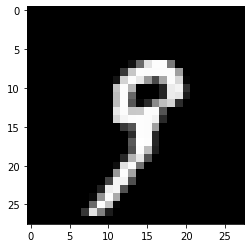

In [6]:
# Visualize the data from the mnist data set
sample_image = train_dataset[19][0]
print(sample_image.shape)
imshow(sample_image[:,:,0].asnumpy(), cmap='gray')

### Image Folder Datasets

A dataset for loading images files stored in a folder structure.

In computer vision applications, it's common to have image data stored in the folder on your machine. Mxnet Gluon also provides a dataset API for this use case. The imagefolderdataset allows you to create a dataset by passing in a path to the folder that contains your data.

In [ ]:
image_dataset = gluon.data.vision.datasets.ImageFolderDataset('path_to_folder')

### Custom Datasets

You can extend the gluon Dataset and DataLoader class to implement custom handling for your data.

To create a custom dataset, create a custom Python class that extends the Gluon dataset abstract class and define an init method for your class. Then simply override the getItem and len function.

In [8]:
# This code shows an example for a custom Gluon dataset backed by a Python dictionary.

class MyCustomDataset(gluon.data.Dataset):

    # In the init method, we simply store the init dictionary as dictator and the dictionary keys as a Python list called dict keys. We use this list to map indices to dictionary keys.
    def __init__(self, dict_data):
        self.dict_data = dict_data
        self.dict_keys = list(dict_data.keys())

    # In the getItem method, simply get the key that corresponds to an index and then get the value from the dictionary that corresponds to the key.
    def __getitem__(self, idx):
        return self.dict_data[self.dict_keys[idx]]

    # The len method, simply uses the Python dictionary len method which returns the number of items in the dictionary.
    def __len__(self):
        return len(self.dict_data)

In [9]:
dataset = MyCustomDataset({'a':mx.nd.array(1,),
                            'b':mx.nd.array(2,),
                            'c':mx.nd.array(3,)})

dataset[2]


3.0
<NDArray  @cpu(0)>